## TASK 1

In [2]:
import pandas as pd
#loading data
data_df = pd.read_csv('/home/xavier/exts-ida/course3/warm-up/task-1.csv')
data_df.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


In [3]:
x = data_df.x.values
y = data_df.y.values

fitting the equation using polyfit() and print a,b parameters

In [4]:
import numpy as np

coefs = np.polyfit(np.log(x), y, deg=1)

# Extract a,b values
a, b = coefs

print('a:', a) 
print('b:', b)

a: 3.3902409977138
b: 31.52920121929613


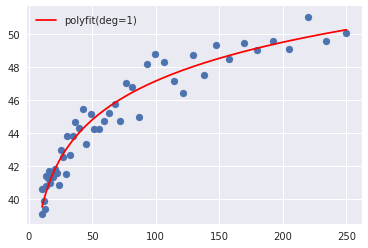

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Import Seaborn library
import seaborn as sns

# Set style to Seaborn
sns.set()

# Compute the associated y values
y_values = a*np.log(x) + b

# Plot the line
plt.scatter(x, y, label=None)
plt.plot(x, y_values, color='red', label='polyfit(deg=1)')
plt.legend()
plt.show()

Computing and printing the R2 coefficient using numpy

In [8]:
corr_matrix = np.corrcoef(x,y_values)
corr_xy = corr_matrix[0,1]
r_squared = corr_xy**2
print('R² is:',r_squared)

R² is: 0.8592733574838715


Explaining how the polyfit() function finds the optimal parameters

polyfit() function fits a polynomial to a set of x/y points,it means that it tries to model relationship between these two variables with a polynomial equation.<br>The most famous polynomial equation is: y = a+b.It involves a slope a and an intercept term b.

Difference between polyfit() function and the gradient descent one

Least squares is a special case of an optimization problem. The objective function is the sum of the squared distances.The solution can be found analytically.<br>
Gradient descent is an algorithm to construct the solution of an optimization problem approximately. The benefit is that it can be applied to any objective function, not just squared distances.<br>
So if we find the least square result unconvincing, squared distances are maybe not the adequate objective function for your problem. If we find an alternative one, gradient descent is a way to obtain at least a locally optimal solution.

## TASK 2

In [9]:
import pandas as pd
#loading data
data_df = pd.read_csv('/home/xavier/exts-ida/course3/warm-up/task-2.csv')
data_df.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


Fitting linear regression without removing the outliers.Printing the mean absolute error (MAE) on the test set

In [13]:
cols=['x1','x2','x3']
X_poly = data_df[cols]
y = data_df.y.values

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split intro train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    data_df, y, train_size=0.8, test_size=0.2, random_state=0)

print('Train set:', X_tr.shape, y_tr.shape)
print('Test set:', X_te.shape, y_te.shape)

Train set: (800, 4) (800,)
Test set: (200, 4) (200,)


In [15]:
# Mean absolute error (MAE)
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [17]:
from sklearn.linear_model import LinearRegression  #, Ridge
from sklearn.metrics import mean_squared_error as mse

# Fit a linear regression
lr = LinearRegression()
lr.fit(X_tr, y_tr)
print('Linear regression - MAE test:',MAE(y_te, lr.predict(X_te)))

Linear regression - MAE test: 3.410605131648481e-14


Removing the outliers and comparing the results of MAE

In [18]:
# (B) Remove outliers
# Compute z-scores
z_scores = (y_tr - np.mean(y_tr)) / np.std(y_tr)

In [20]:
# Detect "extreme" data points
# 2 standard deviations away form the mean
idx = np.abs(z_scores) < 2 

# Remove them
x_tr2, y_tr2 = X_tr[idx], y_tr[idx]

In [22]:
# Fit a linear regression
lr = LinearRegression()
lr.fit(x_tr2, y_tr2)
print('Linear regression - MAE test:',MAE(y_te, lr.predict(X_te)))

Linear regression - MAE test: 3.637978807091713e-14


Computing linear regression with huber loss on data with outliers

In [26]:
from sklearn.linear_model import HuberRegressor

# Huber loss
huber = HuberRegressor(epsilon=1.45)   
huber.fit(X_tr, y_tr) # Fit to train data
y_pred_huber = huber.predict(X_te), # Predictions for test data
    
mae_huber = MAE(y_te, y_pred_huber)
print('MAE Huber: ',mae_huber)

MAE Huber:  2.164979892995689e-06


## TASK 3

In [89]:
import pandas as pd
#loading data
data_df = pd.read_csv('/home/xavier/exts-ida/course3/warm-up/task-3.csv')
data_df.head()

,x,y
0,3.588,0.473
1,3.551,0.784
2,3.610,0.847
3,3.704,0.904
4,3.716,1.118


In [49]:
X = data_df.x.values
y = data_df.y.values

Splitting data into 50-50 train/test sets using train_test_split()

In [90]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split intro train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, train_size=0.5, test_size=0.5, random_state=0)

Fitting a polynomial of degree 10 to the train set

In [96]:
#X_tr.shape
y_tr.shape

(25,)

In [63]:
import numpy as np

# (A) Fit a polynomial
coefs = np.polyfit(X_tr, y_tr, deg=10)

# (B) Print coefficients
#print('Coefficients:', coefs)

# (C) Plot the polynomial
# Generate a hundred data points between min(x) and max(x)
#x_values = np.linspace(min(x), max(x), num=100)

# Compute predictions for these sample data points
y_values_te = np.polyval(coefs, X_te)
y_values_tr = np.polyval(coefs, X_tr)

In [64]:
# Compute the squares of residuals
squares_residuals_te = np.square(y_te - y_values_te)
squares_residuals_tr = np.square(y_tr - y_values_tr)

In [65]:
rss_te = np.sum(squares_residuals_te)
rss_tr = np.sum(squares_residuals_tr)

In [66]:
print('RSS test:',rss_te)
print('------------')
print('RSS train:',rss_tr)

RSS test: 1.3970410623827785
------------
RSS train: 0.6368278120019941


Plotting model with 50 data points

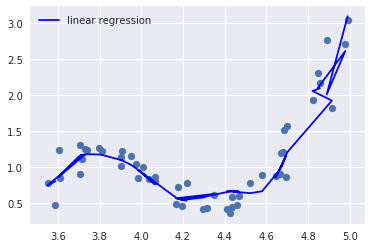

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

# (A) Fit a polynomial
#coefs_all = np.polyfit(X, y, deg=3)

plt.scatter(X, y)# s=10)
y_values = np.polyval(coefs,X)
plt.plot(X, y_values, label='linear regression')
plt.legend()
plt.show()

Applying regularization using ridge regression

In [105]:
X_tr = X_tr.reshape(-1,1)
y_tr = y_tr.reshape(-1,1)

X_te = X_te.reshape(-1,1)
y_te = y_te.reshape(-1,1)

X = X.reshape(-1,1)
y = y.reshape(-1,1)

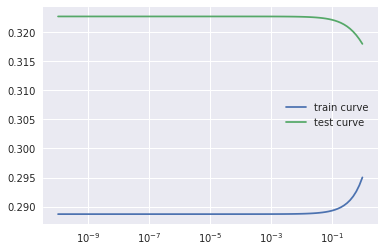

In [114]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse

# Define a set of alpha values
alphas = np.logspace(-10, 0, num=100)

# Save train/test scores
train_scores = []
test_scores = []
p_scores = []

# Grid search
for alpha in alphas:
    # Ridge regression
    ridge = Ridge(alpha)
    ridge.fit(X, y)
    
    # Train score
    y_pred = ridge.predict(X_tr)
    train_scores.append(mse(y_tr, y_pred))
    
    # Test score
    y_pred = ridge.predict(X_te)
    test_scores.append(mse(y_te, y_pred))
    
    #data score
    y_p = ridge.predict(X)
    p_scores.append(mse(y, y_p))
    
# Plot validation curves
plt.semilogx(alphas, train_scores, label='train curve')
plt.semilogx(alphas, test_scores, label='test curve')
plt.legend()
plt.show()

In [136]:
# Find best alpha
idx = np.argmin(p_scores)
best_alpha = alphas[idx]
print('Best alpha {:.1e}'.format(best_alpha))

# Print train/test scores
print('Ridge regression  - MSE train: {:,.3f} test: {:,.3f}'.format(
    train_scores[idx],
    test_scores[idx]
))

Best alpha 1.3e-10
Ridge regression 2 - MSE train: 0.289 test: 0.323


Computing the train/test RSS of the tuned ridge regression

In [126]:
# Ridge regression with tuned alpha
ridge2 = Ridge(best_alpha)
ridge2.fit(X, y)


Ridge(alpha=1.2618568830660183e-10, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [127]:
y_values_te = ridge2.predict(X_te)
y_values_tr = ridge2.predict(X_tr)

In [128]:
squares_residuals_te = np.square(y_te - y_values_te)
squares_residuals_tr = np.square(y_tr - y_values_tr)

In [129]:
rss_te = np.sum(squares_residuals_te)
rss_tr = np.sum(squares_residuals_tr)

In [130]:
print('RSS test:',rss_te)
print('------------')
print('RSS train:',rss_tr)

RSS test: 8.067775252918937
------------
RSS train: 7.217859544768098
